In [1]:
#file_path = './Bank_Personal_Loan_Modelling-1.csv'

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
from sklearn.preprocessing import LabelEncoder
import copy
from datetime import timezone
from datetime import datetime
%matplotlib inline
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
import scipy.stats as stats
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans
from sklearn import datasets, linear_model, metrics 

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [2]:
df = pd.read_csv('innercity.csv') # read the data as a data frame
original_df = pd.read_csv('innercity.csv') # save original df 

In [3]:
df.head()

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  basement  yr_built  yr_renovated  \
0        13457   1.0      0      0  ...         0      1956             0   
1         7500   1.0      0      0  ...       800      1976             0   
2         4324   2.0      0      0  ...         0      2006             0   
3         3844   1.0      0      0  ...         0      1916             0   
4         4050   1.0      0      0  ...         0      1954             0   

   zipcode      lat     long  living_measure15  lot_measure15  furnished  \
0    98133  47.7174 -122.336              2120           7553          1   
1    98023  47.3165 -122.386              2260           8800          0   
2    98038  47.3515 -121.999              2370           4348          0   
3    98133  47.7049 -122.349              1520           3844          0   
4    98115  47.6768 -122.269              1900           5940          0   

   total_area  
0       16477  
1       10050  
2        6694  
3        4664  
4        5450  

[5 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [5]:
df.isna().apply(pd.value_counts) 

cid  dayhours  price  room_bed  room_bath  living_measure  \
False  21613     21613  21613     21613      21613           21613   

       lot_measure   ceil  coast  sight  ...  basement  yr_built  \
False        21613  21613  21613  21613  ...     21613     21613   

       yr_renovated  zipcode    lat   long  living_measure15  lot_measure15  \
False         21613    21613  21613  21613             21613          21613   

       furnished  total_area  
False      21613       21613  

[1 rows x 23 columns]

In [6]:
df['SellDate']= pd.to_datetime(df['dayhours']) 

In [7]:
df['SellYear']= df['SellDate'].dt.year
df['SellMonth']= df['SellDate'].dt.month

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 26 columns):
cid                 21613 non-null int64
dayhours            21613 non-null object
price               21613 non-null int64
room_bed            21613 non-null int64
room_bath           21613 non-null float64
living_measure      21613 non-null int64
lot_measure         21613 non-null int64
ceil                21613 non-null float64
coast               21613 non-null int64
sight               21613 non-null int64
condition           21613 non-null int64
quality             21613 non-null int64
ceil_measure        21613 non-null int64
basement            21613 non-null int64
yr_built            21613 non-null int64
yr_renovated        21613 non-null int64
zipcode             21613 non-null int64
lat                 21613 non-null float64
long                21613 non-null float64
living_measure15    21613 non-null int64
lot_measure15       21613 non-null int64
furnished           2

In [9]:
df.head() #format='%d%b%Y:%H:%M:%S.%f'

cid         dayhours   price  room_bed  room_bath  living_measure  \
0  3034200666  20141107T000000  808100         4       3.25            3020   
1  8731981640  20141204T000000  277500         4       2.50            2550   
2  5104530220  20150420T000000  404000         3       2.50            2370   
3  6145600285  20140529T000000  300000         2       1.00             820   
4  8924100111  20150424T000000  699000         2       1.50            1400   

   lot_measure  ceil  coast  sight  ...  zipcode      lat     long  \
0        13457   1.0      0      0  ...    98133  47.7174 -122.336   
1         7500   1.0      0      0  ...    98023  47.3165 -122.386   
2         4324   2.0      0      0  ...    98038  47.3515 -121.999   
3         3844   1.0      0      0  ...    98133  47.7049 -122.349   
4         4050   1.0      0      0  ...    98115  47.6768 -122.269   

   living_measure15  lot_measure15  furnished  total_area   SellDate  \
0              2120           7553          1       16477 2014-11-07   
1              2260           8800          0       10050 2014-12-04   
2              2370           4348          0        6694 2015-04-20   
3              1520           3844          0        4664 2014-05-29   
4              1900           5940          0        5450 2015-04-24   

   SellYear  SellMonth  
0      2014         11  
1      2014         12  
2      2015          4  
3      2014          5  
4      2015          4  

[5 rows x 26 columns]

In [10]:
df.describe().T

count          mean           std           min  \
cid               21613.0  4.580302e+09  2.876566e+09  1.000102e+06   
price             21613.0  5.401822e+05  3.673622e+05  7.500000e+04   
room_bed          21613.0  3.370842e+00  9.300618e-01  0.000000e+00   
room_bath         21613.0  2.114757e+00  7.701632e-01  0.000000e+00   
living_measure    21613.0  2.079900e+03  9.184409e+02  2.900000e+02   
lot_measure       21613.0  1.510697e+04  4.142051e+04  5.200000e+02   
ceil              21613.0  1.494309e+00  5.399889e-01  1.000000e+00   
coast             21613.0  7.541757e-03  8.651720e-02  0.000000e+00   
sight             21613.0  2.343034e-01  7.663176e-01  0.000000e+00   
condition         21613.0  3.409430e+00  6.507430e-01  1.000000e+00   
quality           21613.0  7.656873e+00  1.175459e+00  1.000000e+00   
ceil_measure      21613.0  1.788391e+03  8.280910e+02  2.900000e+02   
basement          21613.0  2.915090e+02  4.425750e+02  0.000000e+00   
yr_built          21613.0  1.971005e+03  2.937341e+01  1.900000e+03   
yr_renovated      21613.0  8.440226e+01  4.016792e+02  0.000000e+00   
zipcode           21613.0  9.807794e+04  5.350503e+01  9.800100e+04   
lat               21613.0  4.756005e+01  1.385637e-01  4.715590e+01   
long              21613.0 -1.222139e+02  1.408283e-01 -1.225190e+02   
living_measure15  21613.0  1.986552e+03  6.853913e+02  3.990000e+02   
lot_measure15     21613.0  1.276846e+04  2.730418e+04  6.510000e+02   
furnished         21613.0  1.966872e-01  3.975030e-01  0.000000e+00   
total_area        21613.0  1.718687e+04  4.158908e+04  1.423000e+03   
SellYear          21613.0  2.014323e+03  4.676160e-01  2.014000e+03   
SellMonth         21613.0  6.574423e+00  3.115308e+00  1.000000e+00   

                           25%           50%           75%           max  
cid               2.123049e+09  3.904930e+09  7.308900e+09  9.900000e+09  
price             3.219500e+05  4.500000e+05  6.450000e+05  7.700000e+06  
room_bed          3.000000e+00  3.000000e+00  4.000000e+00  3.300000e+01  
room_bath         1.750000e+00  2.250000e+00  2.500000e+00  8.000000e+00  
living_measure    1.427000e+03  1.910000e+03  2.550000e+03  1.354000e+04  
lot_measure       5.040000e+03  7.618000e+03  1.068800e+04  1.651359e+06  
ceil              1.000000e+00  1.500000e+00  2.000000e+00  3.500000e+00  
coast             0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
sight             0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00  
condition         3.000000e+00  3.000000e+00  4.000000e+00  5.000000e+00  
quality           7.000000e+00  7.000000e+00  8.000000e+00  1.300000e+01  
ceil_measure      1.190000e+03  1.560000e+03  2.210000e+03  9.410000e+03  
basement          0.000000e+00  0.000000e+00  5.600000e+02  4.820000e+03  
yr_built          1.951000e+03  1.975000e+03  1.997000e+03  2.015000e+03  
yr_renovated      0.000000e+00  0.000000e+00  0.000000e+00  2.015000e+03  
zipcode           9.803300e+04  9.806500e+04  9.811800e+04  9.819900e+04  
lat               4.747100e+01  4.757180e+01  4.767800e+01  4.777760e+01  
long             -1.223280e+02 -1.222300e+02 -1.221250e+02 -1.213150e+02  
living_measure15  1.490000e+03  1.840000e+03  2.360000e+03  6.210000e+03  
lot_measure15     5.100000e+03  7.620000e+03  1.008300e+04  8.712000e+05  
furnished         0.000000e+00  0.000000e+00  0.000000e+00  1.000000e+00  
total_area        7.035000e+03  9.575000e+03  1.300000e+04  1.652659e+06  
SellYear          2.014000e+03  2.014000e+03  2.015000e+03  2.015000e+03  
SellMonth         4.000000e+00  6.000000e+00  9.000000e+00  1.200000e+01

In [11]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(df.price),stats.skew(df.living_measure),stats.skew(df.lot_measure),
                                      stats.skew(df.ceil_measure),stats.skew(df.living_measure15),stats.skew(df.lot_measure15),stats.skew(df.total_area)]},
                        index=['price','living_measure','lot_measure','ceil_measure','living_measure15','lot_measure15','total_area'])  # Measure the skeweness of the required columns
Skewness

Skewness
price              4.021436
living_measure     1.471453
lot_measure       13.059113
ceil_measure       1.446564
living_measure15   1.108104
lot_measure15      9.506083
total_area        12.955168

In [12]:
#yr renovated
data=df
data=data.replace(0,np.nan)
m=data['yr_renovated'].mode()
data['yr_renovated'].fillna(value=2014,inplace=True)
data['yr_renovated']

0        2014.0
1        2014.0
2        2014.0
3        2014.0
4        2014.0
          ...  
21608    2014.0
21609    2014.0
21610    2014.0
21611    2014.0
21612    2014.0
Name: yr_renovated, Length: 21613, dtype: float64

In [13]:
mode=data['basement'].mode()
mode
data['basement'].fillna(value=600,inplace=True)
data['basement']

0        600.0
1        800.0
2        600.0
3        600.0
4        600.0
         ...  
21608    600.0
21609    600.0
21610    600.0
21611    600.0
21612    600.0
Name: basement, Length: 21613, dtype: float64

In [14]:
df.drop('yr_renovated',axis=1,inplace=True)

In [15]:
df.drop('basement',axis=1,inplace=True)

In [16]:
df['yr_renovated']=data['yr_renovated']
df['basement']=data['basement']
df

cid         dayhours   price  room_bed  room_bath  \
0      3034200666  20141107T000000  808100         4       3.25   
1      8731981640  20141204T000000  277500         4       2.50   
2      5104530220  20150420T000000  404000         3       2.50   
3      6145600285  20140529T000000  300000         2       1.00   
4      8924100111  20150424T000000  699000         2       1.50   
...           ...              ...     ...       ...        ...   
21608  5137800030  20140701T000000  300000         4       2.50   
21609  8562890910  20140619T000000  320000         4       2.50   
21610  1442880160  20140627T000000  483453         4       2.75   
21611   622100130  20140917T000000  365000         2       2.00   
21612  6413600276  20150324T000000  354950         3       1.00   

       living_measure  lot_measure  ceil  coast  sight  ...     long  \
0                3020        13457   1.0      0      0  ... -122.336   
1                2550         7500   1.0      0      0  ... -122.386   
2                2370         4324   2.0      0      0  ... -121.999   
3                 820         3844   1.0      0      0  ... -122.349   
4                1400         4050   1.0      0      0  ... -122.269   
...               ...          ...   ...    ...    ...  ...      ...   
21608            2303         3826   2.0      0      0  ... -122.165   
21609            3490         5000   2.0      0      0  ... -122.127   
21610            2790         5527   2.0      0      0  ... -121.773   
21611            1440        15000   1.0      0      0  ... -122.159   
21612             970         5922   1.5      0      0  ... -122.321   

       living_measure15  lot_measure15  furnished  total_area   SellDate  \
0                  2120           7553          1       16477 2014-11-07   
1                  2260           8800          0       10050 2014-12-04   
2                  2370           4348          0        6694 2015-04-20   
3                  1520           3844          0        4664 2014-05-29   
4                  1900           5940          0        5450 2015-04-24   
...                 ...            ...        ...         ...        ...   
21608              2516           4500          0        6129 2014-07-01   
21609              2910           5025          0        8490 2014-06-19   
21610              2620           5509          0        8317 2014-06-27   
21611              1780          15000          0       16440 2014-09-17   
21612              1730           6128          0        6892 2015-03-24   

       SellYear  SellMonth  yr_renovated  basement  
0          2014         11        2014.0     600.0  
1          2014         12        2014.0     800.0  
2          2015          4        2014.0     600.0  
3          2014          5        2014.0     600.0  
4          2015          4        2014.0     600.0  
...         ...        ...           ...       ...  
21608      2014          7        2014.0     600.0  
21609      2014          6        2014.0     600.0  
21610      2014          6        2014.0     600.0  
21611      2014          9        2014.0     600.0  
21612      2015          3        2014.0     600.0  

[21613 rows x 26 columns]

In [17]:
#Feature engineering
a=df['lot_measure'].to_numpy()
b=np.log(a)
df['red_lot']=pd.DataFrame(b)

In [18]:
z=df['total_area'].to_numpy()
y=np.log(z)
df['red_total']=pd.DataFrame(y)

In [19]:
df.drop('total_area',axis=1,inplace=True)


In [20]:
df.drop('lot_measure',axis=1,inplace=True)

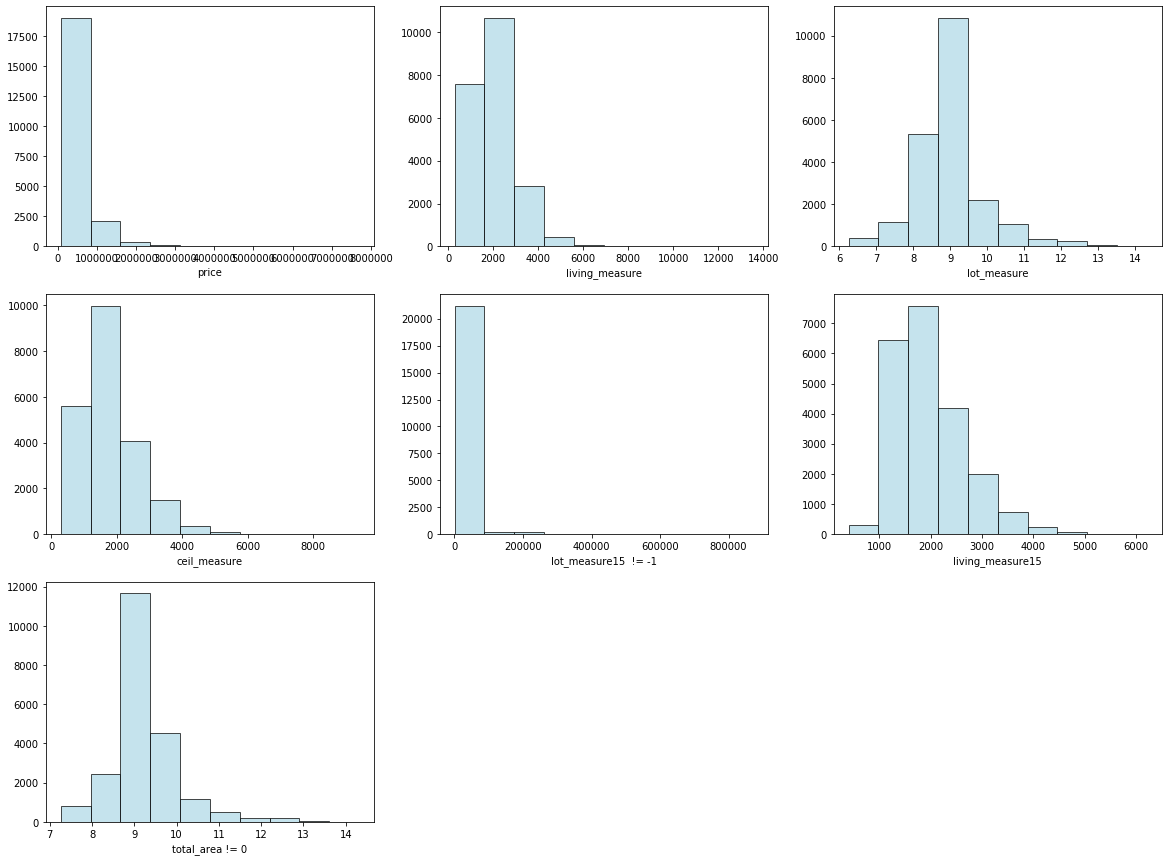

In [21]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(df.price, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('price')

plt.subplot(3,3,2)
plt.hist(df.living_measure, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('living_measure')

plt.subplot(3,3,3)
plt.hist(df.red_lot, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('lot_measure')

plt.subplot(3,3,4)

plt.hist( df['ceil_measure'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('ceil_measure')

plt.subplot(3,3,5)
#plotting subcluster where pday not equal to -1
plt.hist( df['lot_measure15'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('lot_measure15  != -1')

plt.subplot(3,3,6)

plt.hist(df['living_measure15'], color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('living_measure15')

plt.subplot(3,3,7)
#plotting subcluster where pday not equal to 0
plt.hist( df['red_total'] , color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('total_area != 0')


plt.show()

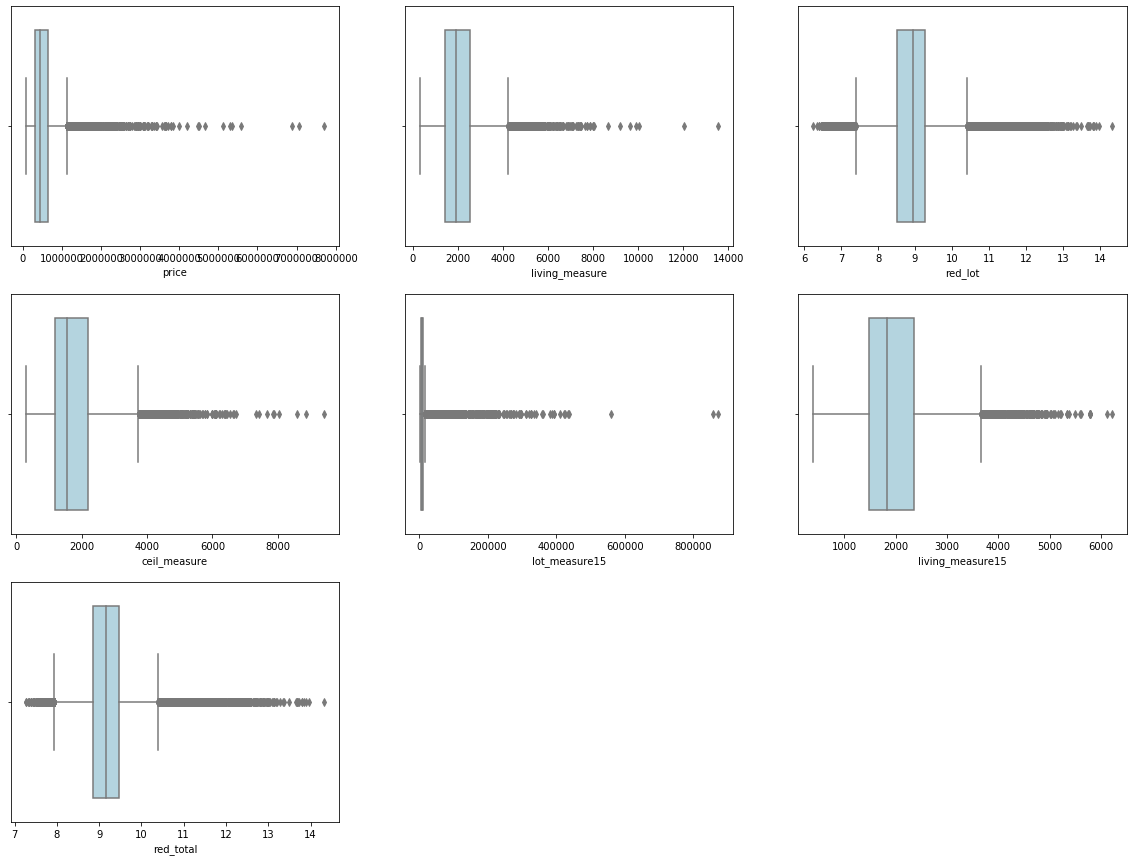

In [22]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.boxplot(x= df.price, color='lightblue')

plt.subplot(3,3,2)
sns.boxplot(x= df.living_measure, color='lightblue')

plt.subplot(3,3,3)
sns.boxplot(x= df.red_lot, color='lightblue')

plt.subplot(3,3,4)
sns.boxplot(x= df['ceil_measure'], color='lightblue')

plt.subplot(3,3,5)
#plotting subcluster where pday not equal to -1
sns.boxplot(x= df['lot_measure15' ], color='lightblue')

plt.subplot(3,3,6)
sns.boxplot(x= df['living_measure15'], color='lightblue')

plt.subplot(3,3,7)
#plotting subcluster where pday not equal to 0
sns.boxplot(x= df[ 'red_total'], color='lightblue')
plt.show()

In [23]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['price']))

threshold = 3

df.iloc[ np.where(z > threshold) ].count()

cid                 406
dayhours            406
price               406
room_bed            406
room_bath           406
living_measure      406
ceil                406
coast               406
sight               406
condition           406
quality             406
ceil_measure        406
yr_built            406
zipcode             406
lat                 406
long                406
living_measure15    406
lot_measure15       406
furnished           406
SellDate            406
SellYear            406
SellMonth           406
yr_renovated        406
basement            406
red_lot             406
red_total           406
dtype: int64

In [24]:
from scipy import stats
import numpy as np

#plotting subcluster where pday not equal to -1

z = np.abs(stats.zscore( df['ceil_measure']))

threshold = 3

df.iloc[ np.where(z > threshold) ].count()

cid                 254
dayhours            254
price               254
room_bed            254
room_bath           254
living_measure      254
ceil                254
coast               254
sight               254
condition           254
quality             254
ceil_measure        254
yr_built            254
zipcode             254
lat                 254
long                254
living_measure15    254
lot_measure15       254
furnished           254
SellDate            254
SellYear            254
SellMonth           254
yr_renovated        254
basement            254
red_lot             254
red_total           254
dtype: int64

In [25]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore( df['lot_measure15']))

threshold = 3

df.iloc[ np.where(z > threshold) ].count()

cid                 363
dayhours            363
price               363
room_bed            363
room_bath           363
living_measure      363
ceil                363
coast               363
sight               363
condition           363
quality             363
ceil_measure        363
yr_built            363
zipcode             363
lat                 363
long                363
living_measure15    363
lot_measure15       363
furnished           363
SellDate            363
SellYear            363
SellMonth           363
yr_renovated        363
basement            363
red_lot             363
red_total           363
dtype: int64

In [26]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore( df['living_measure15']))

threshold = 3

df.iloc[ np.where(z > threshold) ].count()

cid                 237
dayhours            237
price               237
room_bed            237
room_bath           237
living_measure      237
ceil                237
coast               237
sight               237
condition           237
quality             237
ceil_measure        237
yr_built            237
zipcode             237
lat                 237
long                237
living_measure15    237
lot_measure15       237
furnished           237
SellDate            237
SellYear            237
SellMonth           237
yr_renovated        237
basement            237
red_lot             237
red_total           237
dtype: int64

In [27]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore( df['red_total']))

threshold = 3

df.iloc[ np.where(z > threshold) ].count()

cid                 447
dayhours            447
price               447
room_bed            447
room_bath           447
living_measure      447
ceil                447
coast               447
sight               447
condition           447
quality             447
ceil_measure        447
yr_built            447
zipcode             447
lat                 447
long                447
living_measure15    447
lot_measure15       447
furnished           447
SellDate            447
SellYear            447
SellMonth           447
yr_renovated        447
basement            447
red_lot             447
red_total           447
dtype: int64

In [28]:
df['room_bed'].value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: room_bed, dtype: int64

In [29]:
df['room_bath'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.50       1
7.75       1
Name: room_bath, dtype: int64

In [30]:
df['ceil'].value_counts()

1.0    10680
2.0     8241
1.5     1910
3.0      613
2.5      161
3.5        8
Name: ceil, dtype: int64

In [31]:
df['coast'].value_counts()

0    21450
1      163
Name: coast, dtype: int64

In [32]:
df['sight'].value_counts()

0    19489
2      963
3      510
1      332
4      319
Name: sight, dtype: int64

In [33]:
df['condition'].value_counts()

3    14031
4     5679
5     1701
2      172
1       30
Name: condition, dtype: int64

In [34]:
df['quality'].value_counts()

7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: quality, dtype: int64

In [35]:
df['yr_built'].value_counts()


2014    559
2006    454
2005    450
2004    433
2003    422
       ... 
1933     30
1901     29
1902     27
1935     24
1934     21
Name: yr_built, Length: 116, dtype: int64

In [36]:
df['yr_renovated'].value_counts()

2014.0    20790
2013.0       37
2003.0       36
2007.0       35
2005.0       35
          ...  
1934.0        1
1954.0        1
1948.0        1
1944.0        1
1951.0        1
Name: yr_renovated, Length: 69, dtype: int64

In [37]:
df['zipcode'].value_counts()

98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: zipcode, Length: 70, dtype: int64

In [38]:
df['furnished'].value_counts()

0    17362
1     4251
Name: furnished, dtype: int64

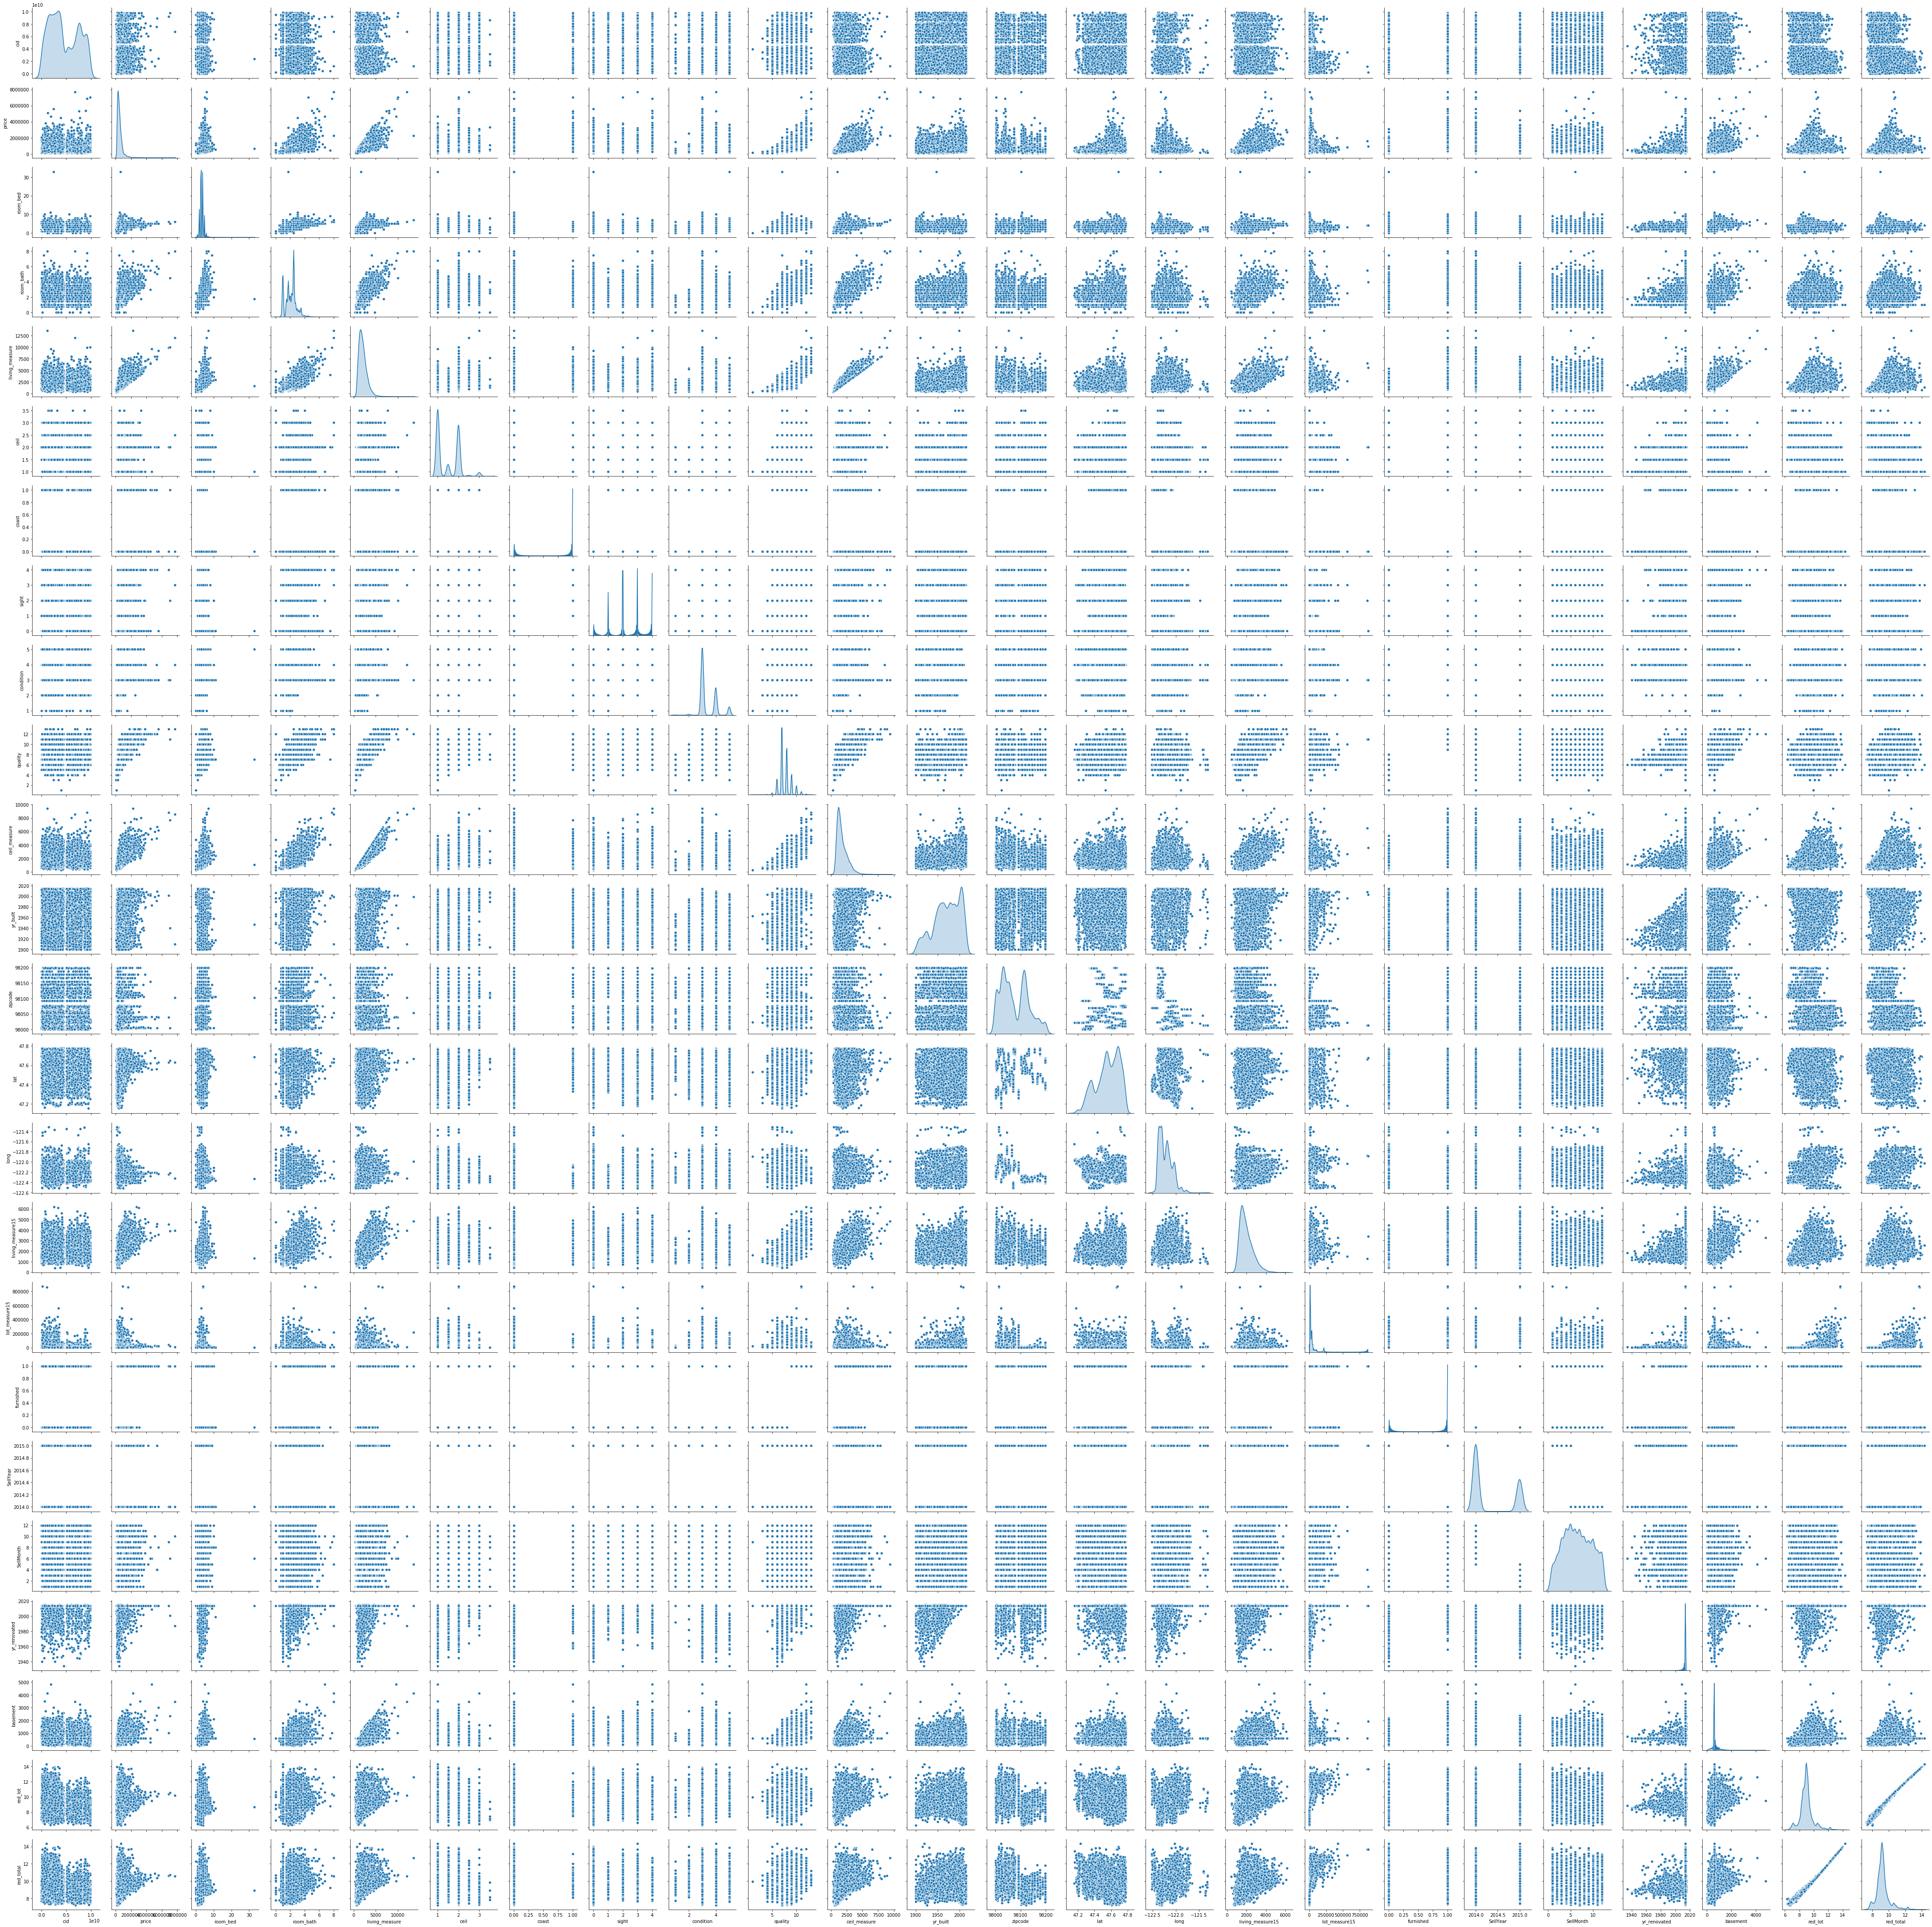

In [39]:
sns.pairplot(df,diag_kind='kde')

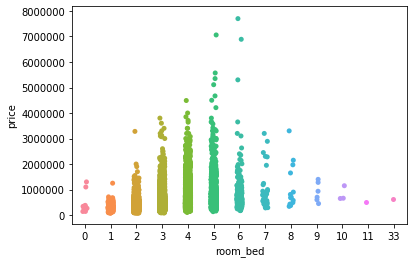

In [39]:
sns.stripplot(df['room_bed'],df['price'])

In [40]:
sns.boxplot(df['room_bath'],df['price'])

In [41]:
sns.boxplot(df['ceil'],df['price'])

In [42]:
sns.boxplot(df['coast'],df['price'])

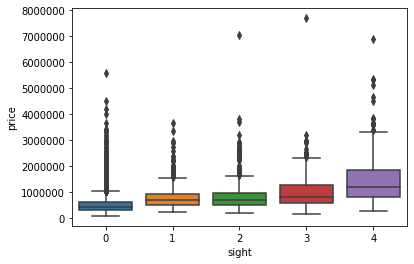

In [43]:
sns.boxplot(df['sight'],df['price'])

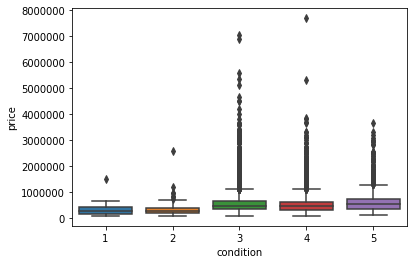

In [44]:
sns.boxplot(df['condition'],df['price'])

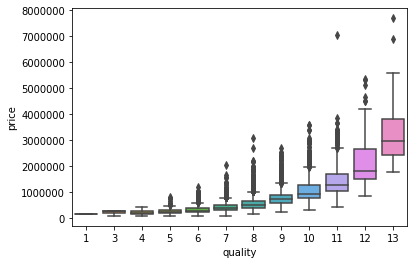

In [45]:
sns.boxplot(df['quality'],df['price'])

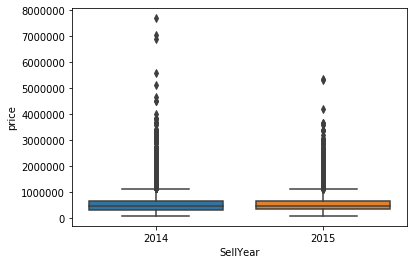

In [46]:
sns.boxplot(df['SellYear'],df['price'])

In [47]:
sns.boxplot(df['SellMonth'],df['price'])

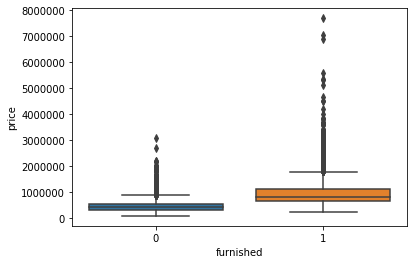

In [48]:
sns.boxplot(df['furnished'],df['price'])

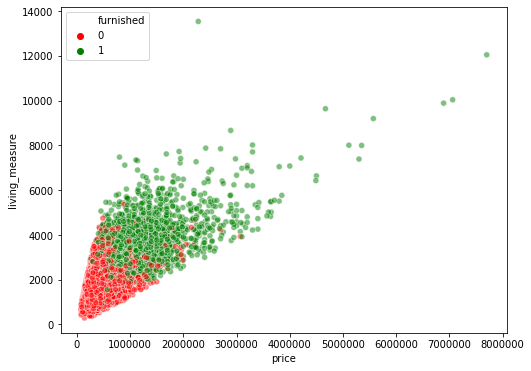

In [49]:
plt.figure(figsize=(8,6))
sns.scatterplot(df['price'],df['living_measure'] ,hue=df['furnished'],palette= ['red','green'] ,alpha=0.5)
plt.show()

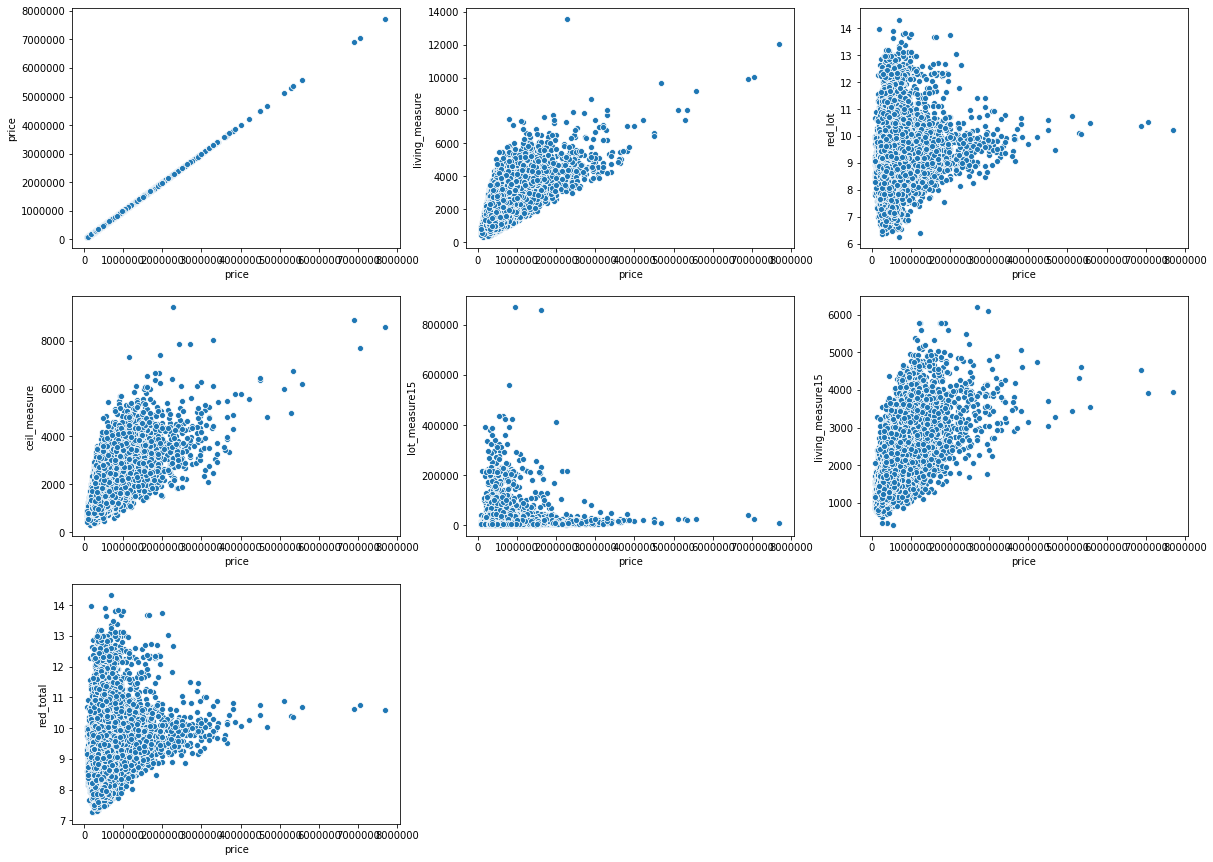

In [39]:
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
sns.scatterplot(df['price'],df['price'])

plt.subplot(3,3,2)
sns.scatterplot(df['price'],df['living_measure'])

plt.subplot(3,3,3)
sns.scatterplot(df['price'],df['red_lot'])

plt.subplot(3,3,4)
sns.scatterplot(df['price'],df['ceil_measure'])

plt.subplot(3,3,5)
sns.scatterplot(df['price'],df['lot_measure15'])

plt.subplot(3,3,6)
sns.scatterplot(df['price'],df['living_measure15'])

plt.subplot(3,3,7)
sns.scatterplot(df['price'],df['red_total'])
plt.show()

In [40]:
sns.boxplot(df['room_bed'],df['living_measure'])

In [41]:
sns.boxplot(df['room_bath'],df['living_measure'])

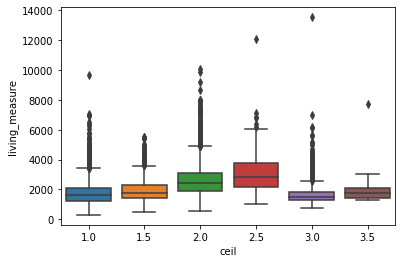

In [42]:
sns.boxplot(df['ceil'],df['living_measure'])

In [43]:
# T-test to check dependency of balance on Target
Ho = "furnished has no effect on Price"   # Stating the Null Hypothesis
Ha = "furnished has an effect on Price"   # Stating the Alternate Hypothesis

x = np.array(df[df['furnished'] == 0].price) # Selecting balance values corresponding to customers who has not taken loan
y = np.array(df[df['furnished'] == 1].price) # Selecting balance values corresponding to customers who has taken loan

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

furnished has an effect on Price as the p_value (0.0) < 0.05


In [44]:
# T-test to check dependency of balance on Target
Ho = "coast has no effect on Price"   # Stating the Null Hypothesis
Ha = "coast has an effect on Price"   # Stating the Alternate Hypothesis

x = np.array(df[df['coast'] == 0].price) # Selecting balance values corresponding to customers who has not taken loan
y = np.array(df[df['coast'] == 1].price) # Selecting balance values corresponding to customers who has taken loan

t, p_value  = stats.ttest_ind(x,y, axis = 0)  #Performing an Independent t-test

if p_value < 0.05:  # Setting our significance level at 5%
    print(f'{Ha} as the p_value ({p_value.round()}) < 0.05')
else:
    print(f'{Ho} as the p_value ({p_value.round(3)}) > 0.05')

coast has an effect on Price as the p_value (0.0) < 0.05


In [45]:
#Splitting dependent and independent variables
from sklearn.preprocessing import StandardScaler

feature_df = df
# Dropping column zip code 
feature_df = feature_df.drop(labels= "SellDate" , axis = 1)
feature_df = feature_df.drop(labels= "SellYear" , axis = 1)
feature_df = feature_df.drop(labels= "SellMonth" , axis = 1)
feature_df = feature_df.drop(labels= "dayhours" , axis = 1)
feature_df = feature_df.drop(labels= "price" , axis = 1)
feature_df = feature_df.drop(labels= "cid" , axis = 1)

X = feature_df
y = df["price"]

In [46]:
# We transform (centralize) the entire X (independent variable data) to zscores through transformation. We will create the PCA dimensions
# on this distribution. 
sc = StandardScaler()
X_std =  sc.fit_transform(X)          
cov_matrix = np.cov(X_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00004627e+00  5.15907508e-01  5.76697375e-01  1.75437052e-01
  -6.58278324e-03  7.95355318e-02  2.84734219e-02  3.56983242e-01
   4.77622260e-01  1.54185203e-01 -1.52675551e-01 -8.93142293e-03
   1.29478966e-01  3.91655645e-01  2.92455768e-02  2.59279861e-01
   9.92128627e-03  3.27684989e-01  1.83580618e-01  2.27460043e-01]
 [ 5.15907508e-01  1.00004627e+00  7.54700198e-01  5.00676338e-01
   6.37465786e-02  1.87745711e-01 -1.24987716e-01  6.65013303e-01
   6.85374187e-01  5.06042852e-01 -2.03875707e-01  2.45740898e-02
   2.23052163e-01  5.68660601e-01  8.71793945e-02  4.84945275e-01
   1.89271553e-03  2.95120119e-01  9.98143911e-02  1.86970580e-01]
 [ 5.76697375e-01  7.54700198e-01  1.00004627e+00  3.53965668e-01
   1.03822621e-01  2.84624355e-01 -5.87553054e-02  7.62739767e-01
   8.76637159e-01  3.18063485e-01 -1.99439271e-01  5.25318928e-02
   2.40234413e-01  7.56455259e-01  1.83294032e-01  6.32975918e-01
  -1.91036642e-02  5.03897989e-01  3.43849386e-01  4

In [47]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.20102643e-01 -3.20838554e-02 -1.18161009e-01  4.13175030e-01
   9.41754852e-02  1.75904557e-01  3.19458169e-01 -2.40012976e-02
   3.19603116e-01  4.31064360e-01 -6.96953660e-04  2.55674869e-02
  -2.27690597e-01 -4.18017154e-02 -2.61630700e-02  2.13264346e-01
   3.77358399e-02 -2.42372928e-01 -4.13986129e-01 -5.90107113e-02]
 [-3.13791709e-01 -1.89025384e-01 -2.91623873e-02  1.10412912e-01
   8.43167851e-02  6.93175323e-02  1.68025420e-01  5.34552814e-03
   2.00506648e-01 -1.73300139e-01  3.84455829e-03  1.17980270e-01
  -1.43108360e-03  9.23869637e-02 -4.42317186e-01 -6.16912626e-01
   3.88080416e-02 -1.29830212e-02  2.16334928e-01 -3.08510733e-01]
 [-3.66540680e-01 -4.52425913e-02 -1.70821536e-01  1.36266746e-01
  -7.97569085e-03  3.76986630e-02  7.09558333e-02 -1.36568311e-02
  -1.57389767e-02  1.06576249e-02  1.20502581e-01 -7.43598893e-01
   5.78203864e-02  8.11580409e-02  3.83623950e-01 -1.54627639e-01
   2.76440175e-02  1.20619297e-01  1.77057917e-01  1.168

In [48]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]

# Let's confirm our sorting worked, print out eigenvalues
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

[(6.126799830868622, array([-0.22010264, -0.31379171, -0.36654068, -0.17950658, -0.04666529,
       -0.11122891,  0.06204747, -0.33780379, -0.36106248, -0.20686636,
        0.15303107,  0.00946688, -0.1817642 , -0.33559612, -0.13242224,
       -0.29480875, -0.00602776, -0.14427587, -0.19106248, -0.22331278])), (2.6648985148140354, array([-0.03208386, -0.18902538, -0.04524259, -0.36777566,  0.0344554 ,
        0.02977563,  0.18535482, -0.1681173 , -0.08845704, -0.20103827,
       -0.15071857, -0.15382209,  0.16627918, -0.00738468,  0.37323423,
       -0.11064117, -0.04233188,  0.1115943 ,  0.50126692,  0.47102005])), (2.0409938401217786, array([-0.11816101, -0.02916239, -0.17082154,  0.15067258, -0.26060762,
       -0.38964702, -0.23929901, -0.07407296,  0.0142862 ,  0.38407316,
       -0.36452644, -0.23797625,  0.38972106, -0.07066319,  0.08659727,
       -0.08265625,  0.17471869, -0.33366743,  0.01707391,  0.01502699])), (1.2984676668826713, array([ 0.41317503,  0.11041291,  0.1362667

In [49]:
tot = sum(eigenvalues)
var_explained = [(i / tot) for i in sorted(eigenvalues, reverse=True)]  # an array of variance explained by each 
# eigen vector... there will be 18 entries as there are 18 eigen vectors)
cum_var_exp = np.cumsum(var_explained)  # an array of cumulative variance. There will be 18 entries with 18 th entry 
# cumulative reaching almost 100%
var_explained
# Calculate number of dimension which covers more than 95% of the variance

[0.306325817666989,
 0.1332387607045781,
 0.10204497032506335,
 0.06492037943984708,
 0.059155128930100956,
 0.04933089545401513,
 0.043146431103315286,
 0.04054730444158629,
 0.036608495148663024,
 0.0314229934063498,
 0.02649188240008432,
 0.020689110221214453,
 0.019511151203775293,
 0.018382768264653543,
 0.015115055356182149,
 0.013392047073953958,
 0.010100141955226086,
 0.007645153474994746,
 0.0017615488716346541,
 0.00016996455777261587]

In [50]:
total = 0.96
dimensions = 0
for i in var_explained:
    
    if total <=0:
        break
    else:
        total = total -i
        dimensions = dimensions + 1
        print(i,total)
print("Total Dimensions: ", dimensions)
#[ x*100 for x in var_explained]

0.306325817666989 0.653674182333011
0.1332387607045781 0.5204354216284329
0.10204497032506335 0.4183904513033696
0.06492037943984708 0.35347007186352253
0.059155128930100956 0.2943149429334216
0.04933089545401513 0.24498404747940644
0.043146431103315286 0.20183761637609116
0.04054730444158629 0.16129031193450488
0.036608495148663024 0.12468181678584186
0.0314229934063498 0.09325882337949207
0.02649188240008432 0.06676694097940775
0.020689110221214453 0.04607783075819329
0.019511151203775293 0.026566679554418
0.018382768264653543 0.008183911289764458
0.015115055356182149 -0.006931144066417691
Total Dimensions:  15


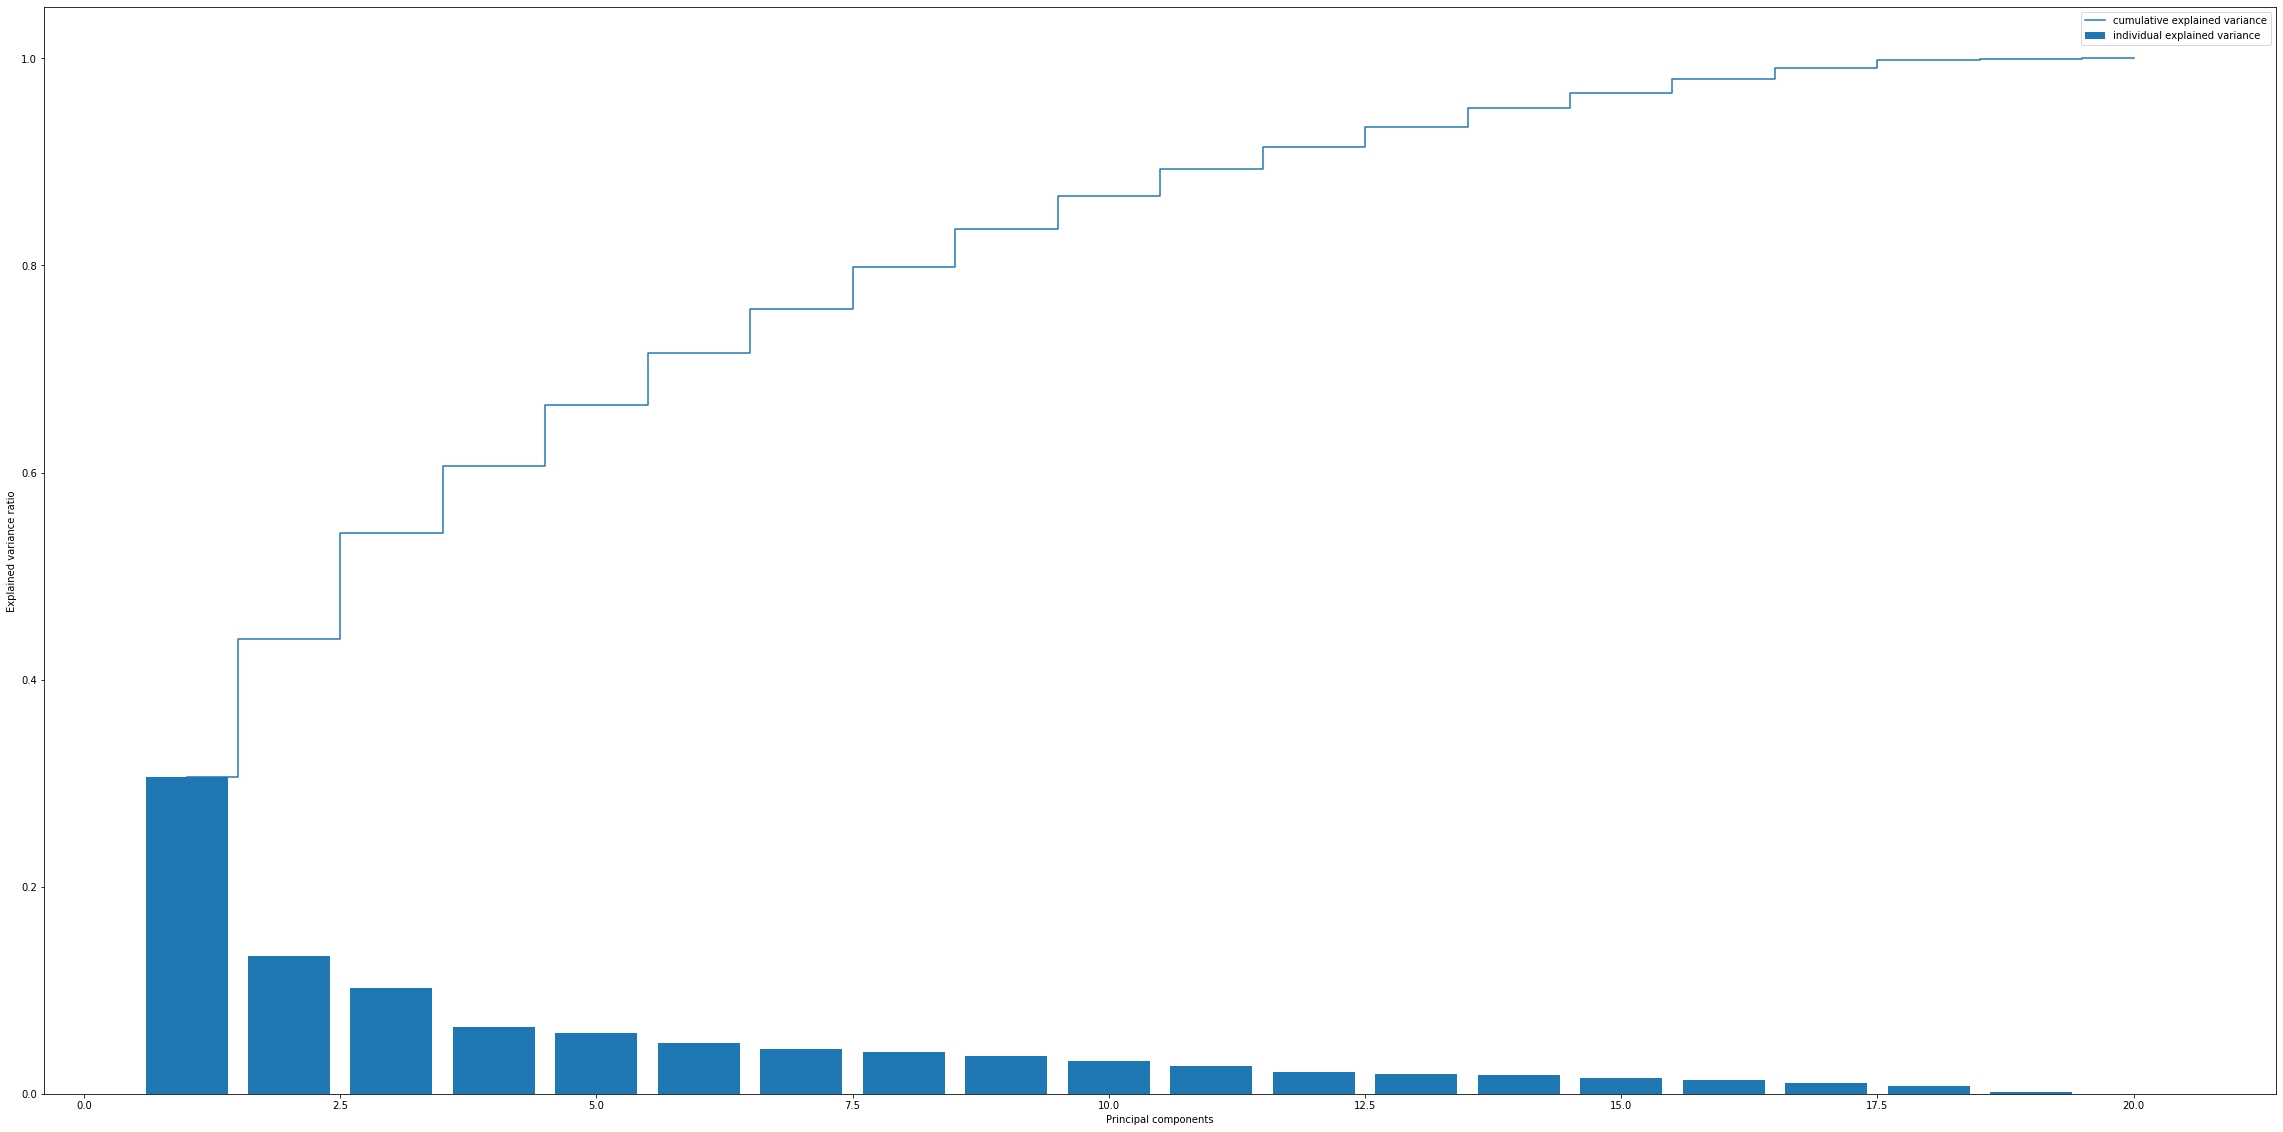

In [51]:
plt.figure(figsize=(40, 20))
plt.bar(range(1,21), var_explained, alpha=1, align='center', label='individual explained variance')
plt.step(range(1,21),cum_var_exp, where= 'mid', label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc = 'best')
plt.show()

In [52]:
# P_reduce represents reduced mathematical space....

P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 18 to 7 dimension space

X_std_7D = np.dot(X_std,P_reduce.T)   # projecting original data into principal component dimensions

Proj_data_df = pd.DataFrame(X_std_7D)  # converting array to dataframe for pairplot

In [53]:
Proj_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 7 columns):
0    21613 non-null float64
1    21613 non-null float64
2    21613 non-null float64
3    21613 non-null float64
4    21613 non-null float64
5    21613 non-null float64
6    21613 non-null float64
dtypes: float64(7)
memory usage: 1.2 MB


Model

In [54]:
y=df[['price']]
x=Proj_data_df

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30 , random_state=1)

In [55]:
y

price
0      808100
1      277500
2      404000
3      300000
4      699000
...       ...
21608  300000
21609  320000
21610  483453
21611  365000
21612  354950

[21613 rows x 1 columns]

In [67]:
regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [56]:
regression_model.score(X_train, y_train)

NameError: name 'regression_model' is not defined

In [57]:
regression_model.score(X_test, y_test)

NameError: name 'regression_model' is not defined

In [58]:
y_pred = regression_model.predict(X_test)

NameError: name 'regression_model' is not defined

In [59]:
y_pred

NameError: name 'y_pred' is not defined

In [60]:
plt.scatter(y_test['price'], y_pred)

NameError: name 'y_pred' is not defined

In [61]:
# create logistic regression object 
reg = linear_model.LogisticRegression() 

# train the model using the training sets 
reg.fit(X_train, y_train) 

# making predictions on the testing set 
y_pred = reg.predict(X_test) 

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [62]:

from sklearn.naive_bayes import GaussianNB 
gnb =GaussianNB() 
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test) 
a=gnb.score(X_test, y_test)
a

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.0023133867982726712

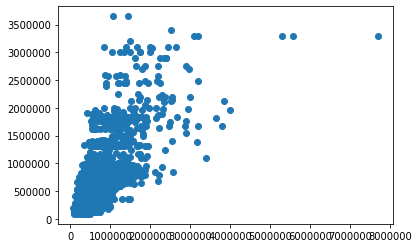

In [63]:

plt.scatter(y_test['price'], y_pred)

In [64]:
ridge = Ridge(alpha=.3)
ridge.fit(X_train,y_train)
print ("Ridge model:", (ridge.coef_))
    

Ridge model: [[-3.18757337e+04  4.01318996e+04  1.39878649e+02 -1.75391979e+04
   6.28602216e+05  5.56810497e+04  2.39309140e+04  8.37921129e+04
   4.57015885e+01 -2.84987986e+03 -6.55906444e+02  5.79361671e+05
  -1.90418305e+05  2.65671173e+01  1.07097434e-01  4.66642185e+04
   4.37097914e+02  1.83829462e+00 -8.49941919e+04  6.59290490e+04]]


In [65]:
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)
print ("Lasso model:", (lasso.coef_))


Lasso model: [-3.18633337e+04  4.01288530e+04  1.39770578e+02 -1.76075044e+04
  6.30533365e+05  5.55991825e+04  2.39366220e+04  8.37620686e+04
  4.57888611e+01 -2.84900239e+03 -6.56686786e+02  5.80081627e+05
 -1.90796053e+05  2.65783443e+01  1.06688276e-01  4.66923276e+04
  4.39427416e+02  1.89781548e+00 -8.54314147e+04  6.64741803e+04]


C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 304388792567385.0, tolerance: 204403602412.77277
  positive)


In [66]:
print(regression_model.score(X_train, y_train))
print(regression_model.score(X_test, y_test))
acc_reg=regression_model.score(X_test, y_test)

NameError: name 'regression_model' is not defined

In [ ]:
print(ridge.score(X_train, y_train))
print(ridge.score(X_test, y_test))
acc_ridge=ridge.score(X_test, y_test)

In [ ]:
print(lasso.score(X_train, y_train))
print(lasso.score(X_test, y_test))
acc_lasso=lasso.score(X_test, y_test)

In [ ]:
from sklearn.svm import SVR
svc = SVR()
svc.fit(X_train, y_train)

In [ ]:
print("Accuracy on training set: {:.2f}".format(svc.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(svc.score(X_test, y_test)))
acc_svr=svc.score(X_test, y_test)

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
df_model = DecisionTreeRegressor(criterion='friedman_mse', max_depth=10, min_samples_split=2,max_features=6,random_state=1)
df_model.fit(X_train, y_train)

Train_score = df_model.score(X_train, y_train)
Test_score = df_model.score(X_test,y_test)
acc_dtree=df_model.score(X_test,y_test)

print(Train_score)
print(Test_score)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error
#Make predictions using predict
predictions = df_model.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print('r^2: ', r2)
print("MSE: ", mse)

#Log metrics
dictn = {"Decision Tree Test Accuracy":Train_score,"Decision Tree Train Accuracy":Test_score,"DT r^2":r2,"DT MSE":mse}
#Experiment.log_metrics(experiment, dictn, prefix=None, step=None, epoch=None)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfcl = RandomForestRegressor(max_depth=27, n_estimators = 150)
rfcl = rfcl.fit(X_train, y_train)

# Accuracy of train and test data
Train_score = rfcl.score(X_train, y_train)
Test_score = rfcl.score(X_test,y_test)
acc_rforest=rfcl.score(X_test,y_test)
print(Train_score)
print(Test_score)

In [ ]:
#Make predictions using predict
predictions = rfcl.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print('r^2: ', r2)
print("MSE: ", mse)


#Log metrics
dictn = {"Random Forest Train Accuracy":Train_score,"Random Forest Test Accuracy":Test_score,"RF r^2":r2,"RF MSE":mse}
#Experiment.log_metrics(experiment, dictn)

Bagging

In [ ]:
from sklearn.ensemble import BaggingRegressor
bgcl = BaggingRegressor(n_estimators=60, max_samples=.4 , oob_score=True)

bgcl = bgcl.fit(X, y)
print(bgcl.oob_score_)
acc_bag=bgcl.oob_score_

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
abcl = AdaBoostRegressor(base_estimator=rfcl, n_estimators=20)
abcl = abcl.fit(X_train, y_train)

Train_score = abcl.score(X_test , y_test)
Test_score = abcl.score(X_train , y_train)
acc_adab=abcl.score(X_test , y_test)

print (Train_score)
print (Test_score)

In [ ]:
#Make predictions using predict
predictions = abcl.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print('r^2: ', r2)
print("MSE: ", mse)


#Log metrics
dictn = {"Ada Boosting Train Accuracy":Train_score,"Ada Boosting Test Accuracy":Test_score," AB r^2":r2,"AB MSE":mse}
# Experiment.log_metrics(experiment, dictn)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbcl = GradientBoostingRegressor(n_estimators = 20, learning_rate = 0.09, max_depth=10)
gbcl = gbcl.fit(X_train, y_train)


# Accuracy of test data

Train_score = gbcl.score(X_test , y_test)
Test_score = gbcl.score(X_train , y_train)
                        
print(Train_score)
print(Test_score)
acc_gradb=gbcl.score(X_test , y_test)


In [ ]:
#Make predictions using predict
predictions = gbcl.predict(X_test)

r2 = r2_score(y_test, predictions)
mse = mean_squared_error(y_test, predictions)
print('r^2: ', r2)
print("MSE: ", mse)


#Log metrics
dictn = {"Gradient Boosting Train Accuracy":Train_score,"Gradient Boosting Test Accuracy":Test_score,"GB r^2":r2,"GB MSE":mse}
# Experiment.log_metrics(experiment, dictn)

In [ ]:
data={'method':['Linear regression','Ridge regression','Lasso regression','SVR','Decision Tree','RandomForest','Bagging','ada_boosting','Gradient_boosting'],'accuracy':[acc_reg,acc_ridge,acc_lasso,acc_svr,acc_dtree,acc_rforest,acc_bag,acc_adab,acc_gradb]}
df = pd.DataFrame(data)
print(df[['method', 'accuracy']])
